**Importing Necessary Libraries**

In [95]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer




**A.Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?**

In [98]:
import warnings
warnings.filterwarnings("ignore")

In [99]:
# Load the dataset
data = pd.read_csv("/content/happiness_data.csv")

# 1. Summarize the Data
# Display basic information about the dataset
print(data.info())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB
None


**Displaying categorical and continuous attributes from the dataset**

In [100]:

# Identify continuous and categorical attributes
categorical_attributes_func = data.select_dtypes(np.object)
continuous_attributes_func = data.select_dtypes(np.number)

In [101]:
continuous_attributes_func

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...
1944,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [102]:
categorical_attributes_func

,Country name
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1944,Zimbabwe
1945,Zimbabwe
1946,Zimbabwe
1947,Zimbabwe


In [103]:
# by above observations, we defined these
continuous_attributes = ['Log GDP per capita', 'Social support', 'Freedom to make life choices',
                         'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Healthy life expectancy at birth','Life Ladder']
categorical_attributes = ['Country name']

OBSERVATIONS:



*   Total entries = 1949
*   Total features = 11

*   Country name attribute has categorical values
*   remaining all attributes has continuous values (ignoring year attribute)






**B.Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

<bound method DataFrame.info of       Log GDP per capita  Social support  Freedom to make life choices  \
0                  7.370           0.451                         0.718   
1                  7.540           0.552                         0.679   
2                  7.647           0.539                         0.600   
3                  7.620           0.521                         0.496   
4                  7.705           0.521                         0.531   
...                  ...             ...                           ...   
1944               7.984           0.768                         0.733   
1945               8.016           0.754                         0.753   
1946               8.049           0.775                         0.763   
1947               7.950           0.759                         0.632   
1948               7.829           0.717                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  

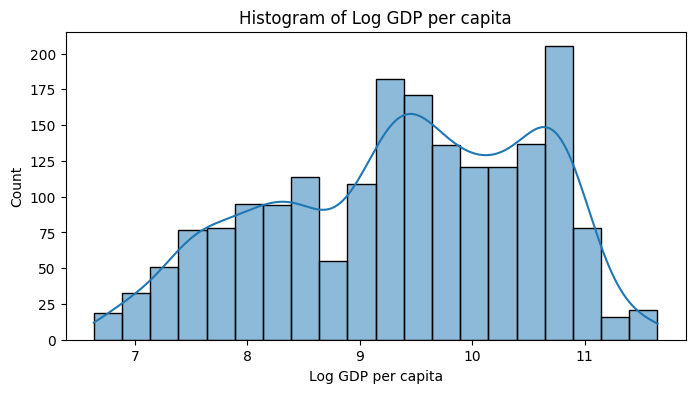

for attribute Social support Mean : 0.8125521694214877, median: 0.8354999999999999, standard_deviation :0.11848163156602372


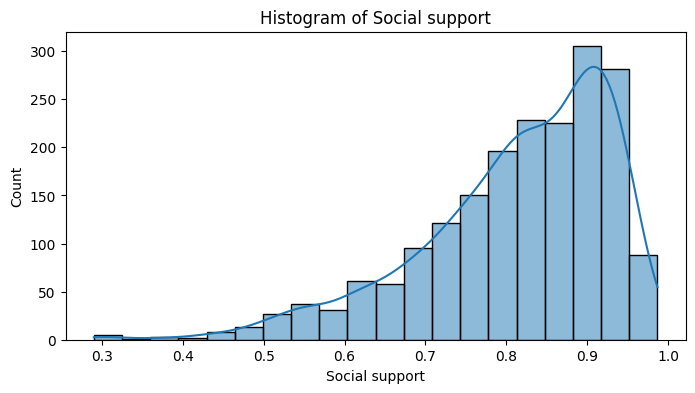

for attribute Freedom to make life choices Mean : 0.7425576421491914, median: 0.763, standard_deviation :0.14209286577975108


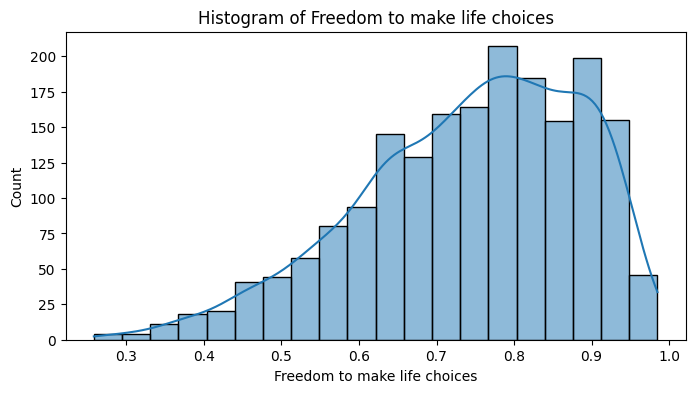

for attribute Generosity Mean : 0.00010322580645161109, median: -0.025500000000000002, standard_deviation :0.16221532880635953


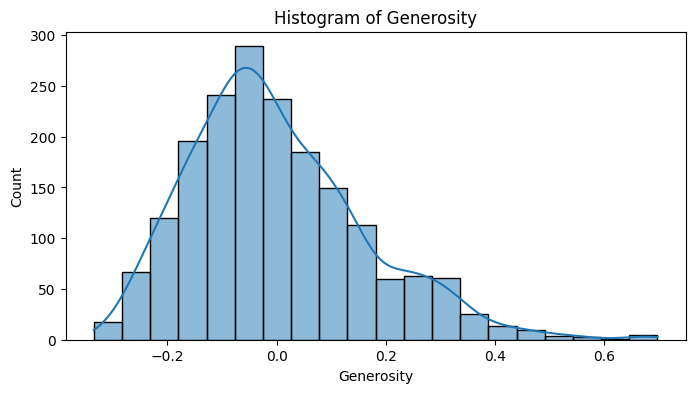

for attribute Perceptions of corruption Mean : 0.7471250679717237, median: 0.802, standard_deviation :0.18678881844350428


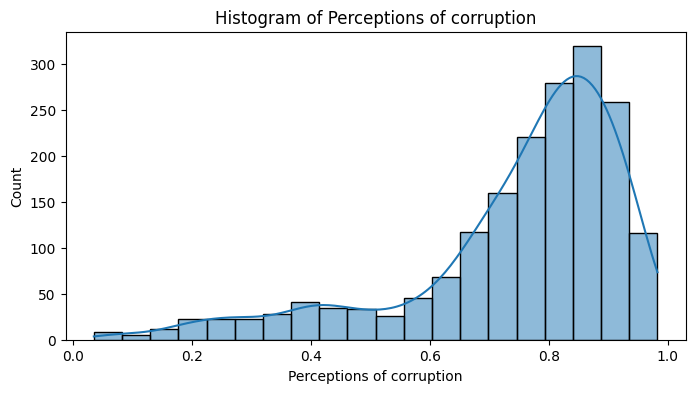

for attribute Positive affect Mean : 0.7100031136481577, median: 0.722, standard_deviation :0.10709993290814633


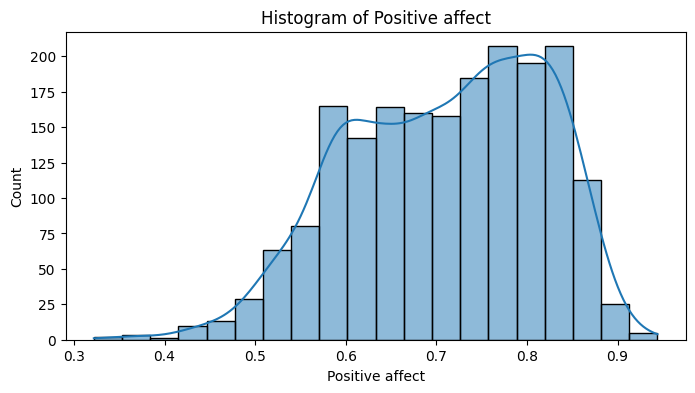

for attribute Negative affect Mean : 0.26854423176409725, median: 0.258, standard_deviation :0.08516806994884693


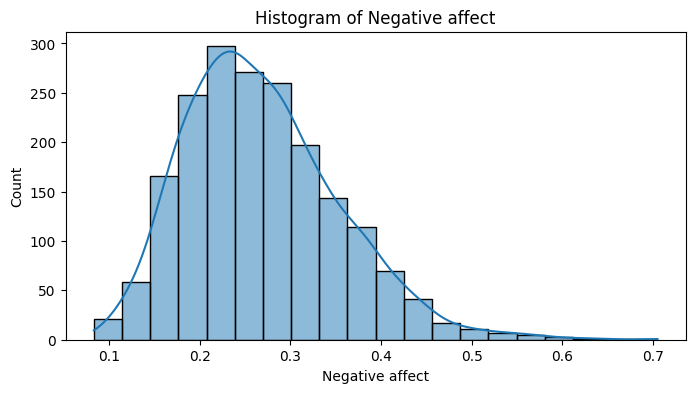

for attribute Healthy life expectancy at birth Mean : 63.35937381203802, median: 65.2, standard_deviation :7.51024461823635


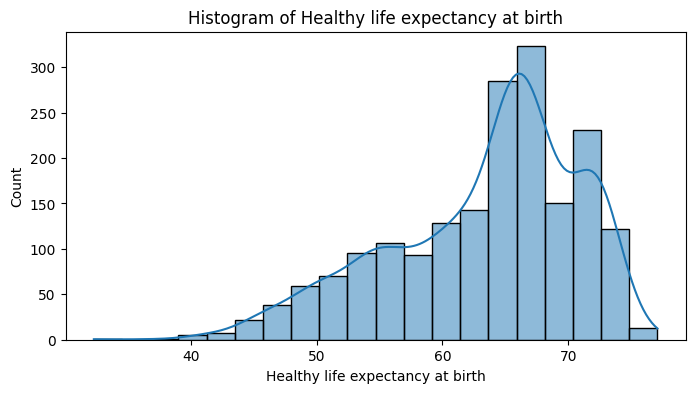

for attribute Life Ladder Mean : 5.46670548999487, median: 5.386, standard_deviation :1.1157105016473905


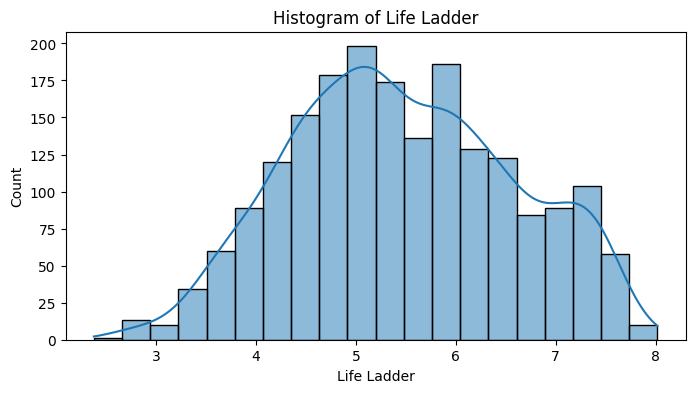

In [104]:
# 2. Display Statistical Values and Visualizations
# Display statistical values for numerical attributes
print(data[continuous_attributes].info)
# Create histograms for numerical attributes
for attr in continuous_attributes:
    print("for attribute {} Mean : {}, median: {}, standard_deviation :{}" .format(attr,data[attr].mean(),data[attr].median(),data[attr].std()))
    plt.figure(figsize=(8, 4))
    sns.histplot(data[attr], bins=20, kde=True)
    plt.title(f'Histogram of {attr}')
    plt.show()



In [105]:
#Display the statistical values for each of the attributes,
data[continuous_attributes].describe()

,Log GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Healthy life expectancy at birth,Life Ladder
count,1913.000000,1936.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000,1894.000000,1949.000000
mean,9.368453,0.812552,0.742558,0.000103,0.747125,0.710003,0.268544,63.359374,5.466705
std,1.154084,0.118482,0.142093,0.162215,0.186789,0.107100,0.085168,7.510245,1.115711
min,6.635000,0.290000,0.258000,-0.335000,0.035000,0.322000,0.083000,32.300000,2.375000
25%,8.464000,0.749750,0.647000,-0.113000,0.690000,0.625500,0.206000,58.685000,4.640000
50%,9.460000,0.835500,0.763000,-0.025500,0.802000,0.722000,0.258000,65.200000,5.386000
75%,10.353000,0.905000,0.856000,0.091000,0.872000,0.799000,0.320000,68.590000,6.283000
max,11.648000,0.987000,0.985000,0.698000,0.983000,0.944000,0.705000,77.100000,8.019000


we observed that attributes like social support, freedom to make life choices and percentage of corruption are left skewed and attributes like positive effects and log GDP show similar kind of traits in distribution.

1.   We ignored Year and Life Ladder attributes
2.   we will see any null values and replace them with median of the each feature
1.   we will consider Life ladder as Label and remove it from the data.












**C. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

                                  Log GDP per capita  Social support  \
Log GDP per capita                          1.000000        0.692602   
Social support                              0.692602        1.000000   
Freedom to make life choices                0.367932        0.410402   
Generosity                                 -0.000915        0.067000   
Perceptions of corruption                  -0.345511       -0.219040   
Positive affect                             0.302282        0.432152   
Negative affect                            -0.210781       -0.395865   
Healthy life expectancy at birth            0.848049        0.616037   
Life Ladder                                 0.790166        0.707806   

                                  Freedom to make life choices  Generosity  \
Log GDP per capita                                    0.367932   -0.000915   
Social support                                        0.410402    0.067000   
Freedom to make life choices                 

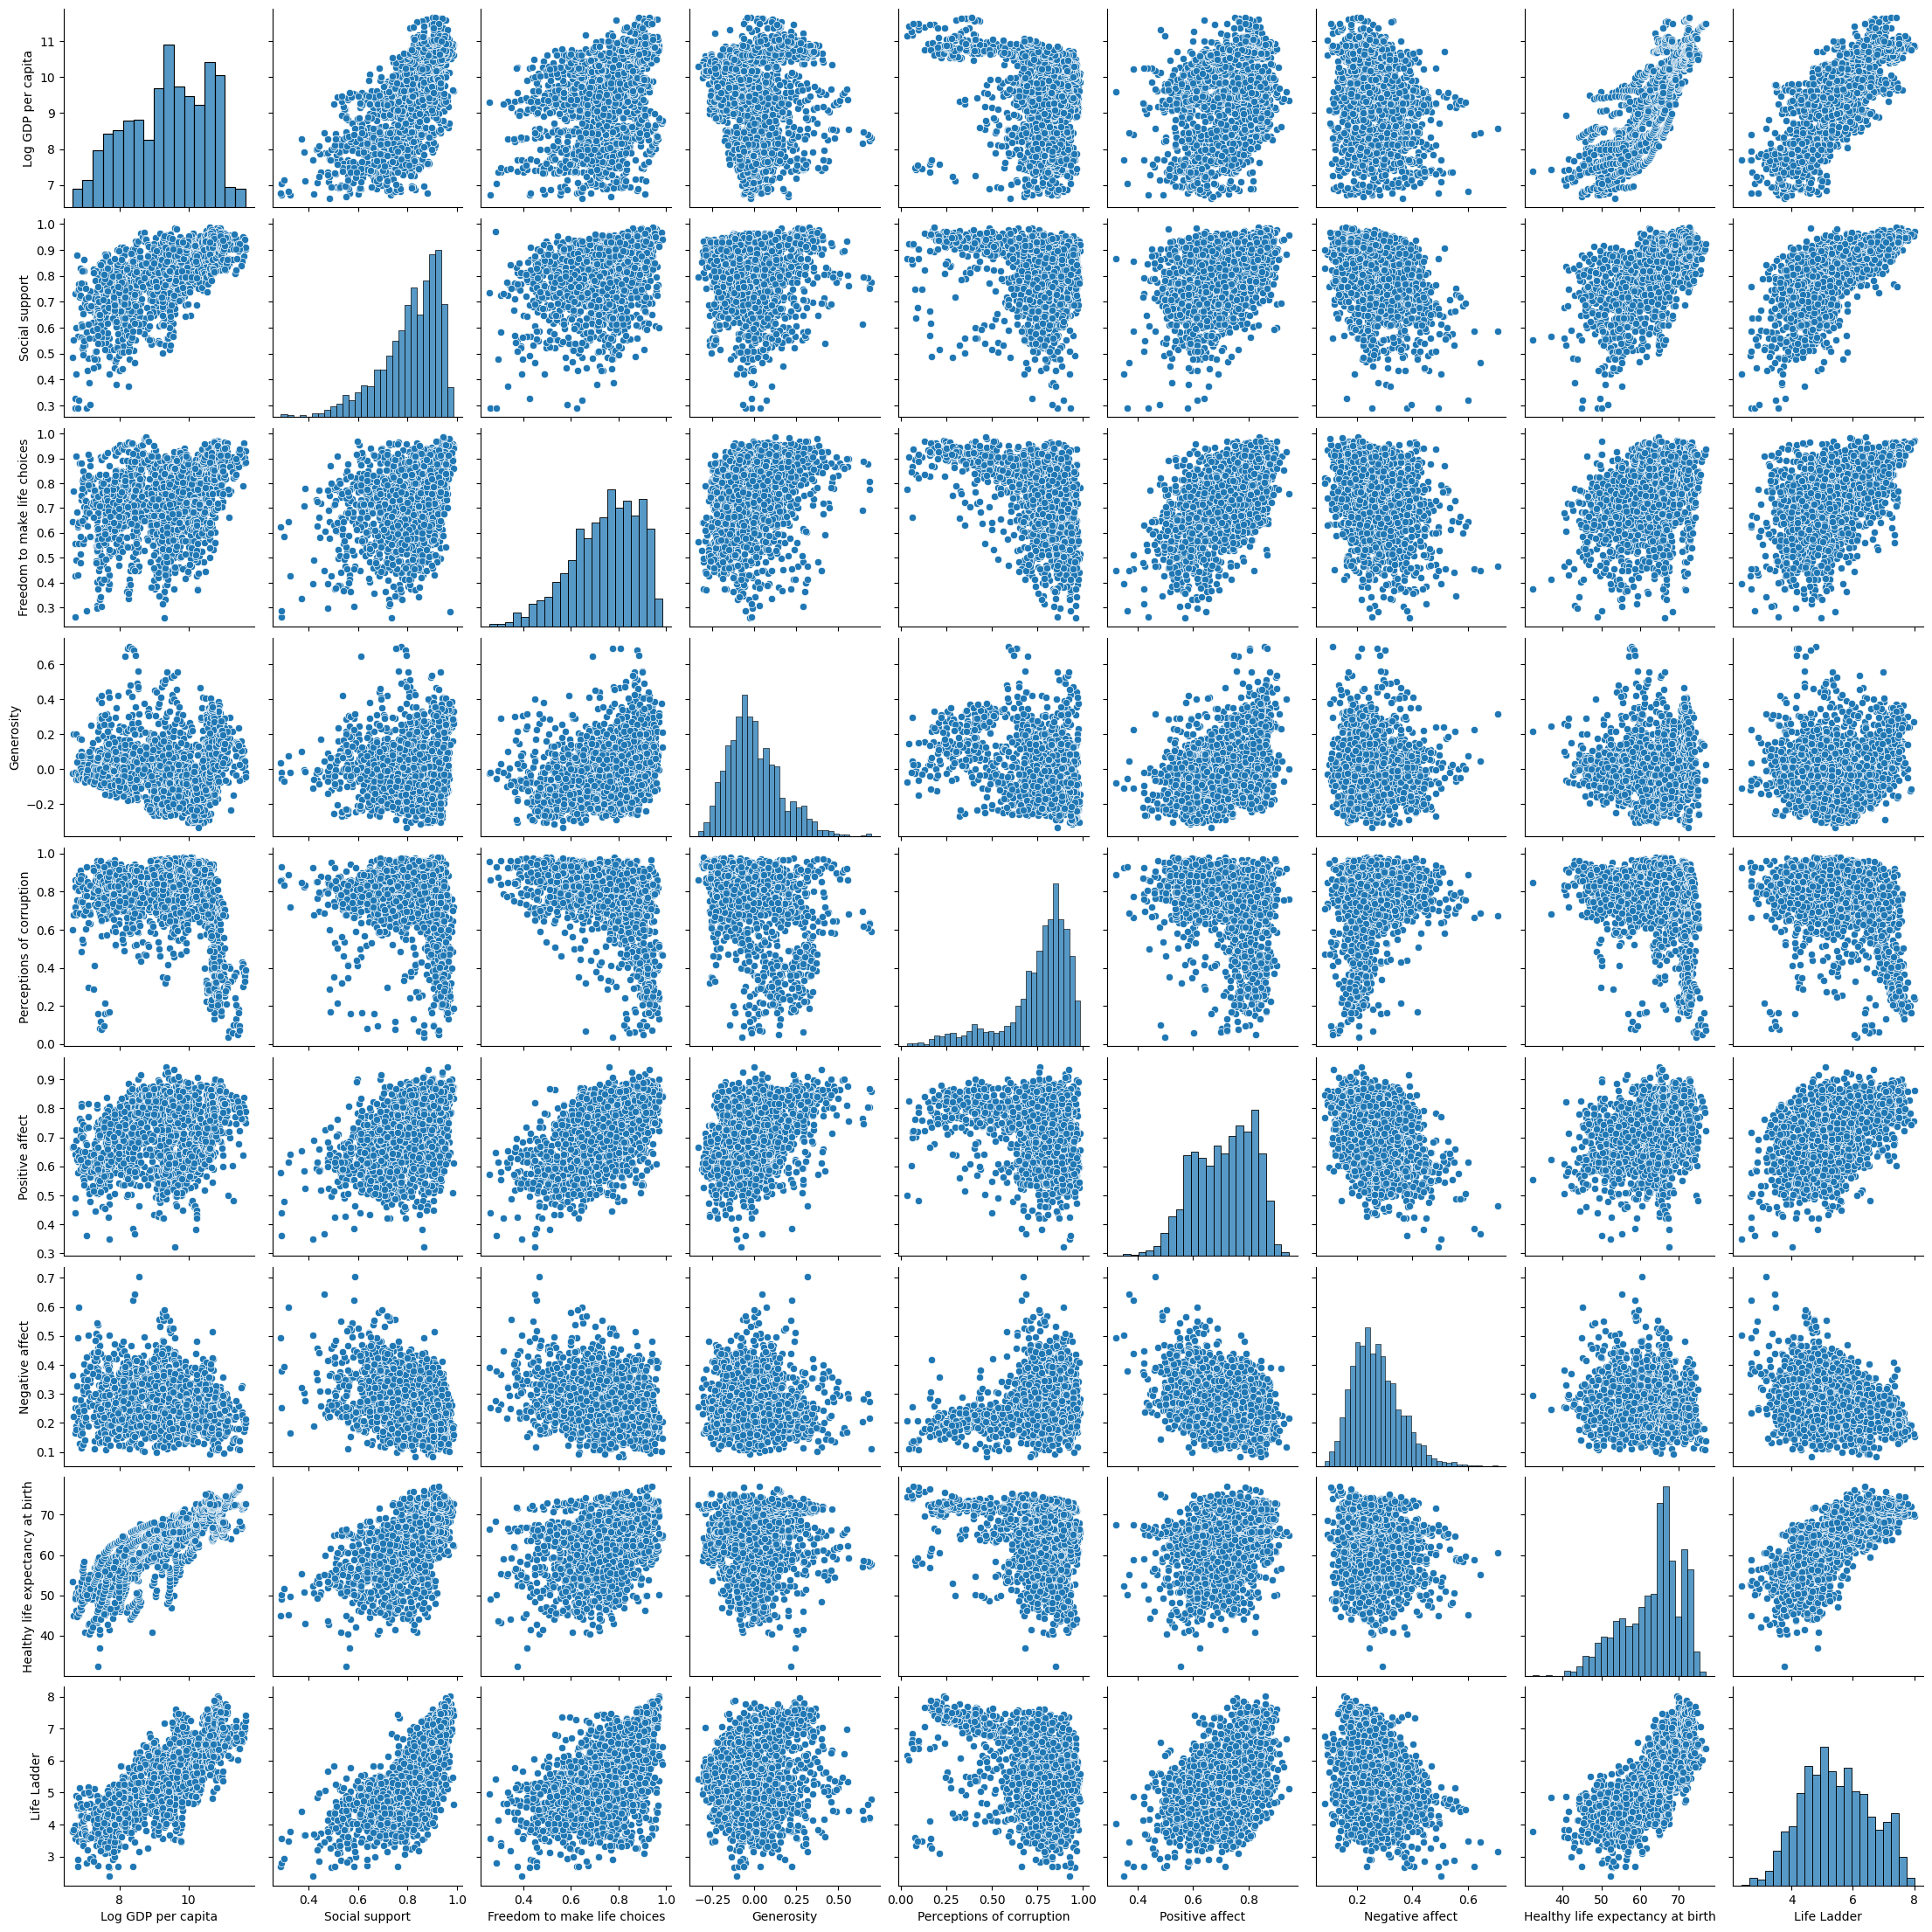

In [106]:
# 3. Analyze Relationships
# Calculate Pearson Correlation Coefficient (PCC)
correlation_matrix = data[continuous_attributes].corr()
print(correlation_matrix)

# Generate scatter plots for key attribute pairs
sns.pairplot(data[continuous_attributes])
plt.show()


Life Ladder                         1.000000
Log GDP per capita                  0.790166
Healthy life expectancy at birth    0.744506
Social support                      0.707806
Positive affect                     0.532273
Freedom to make life choices        0.528063
Generosity                          0.190632
year                                0.035515
Negative affect                    -0.297488
Perceptions of corruption          -0.427245
Name: Life Ladder, dtype: float64


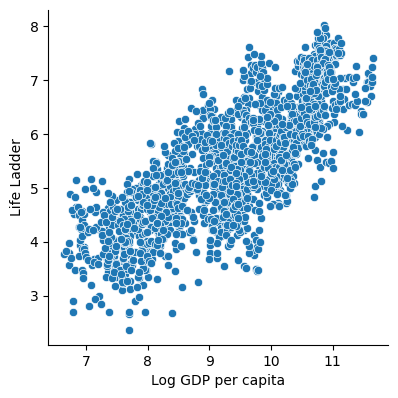

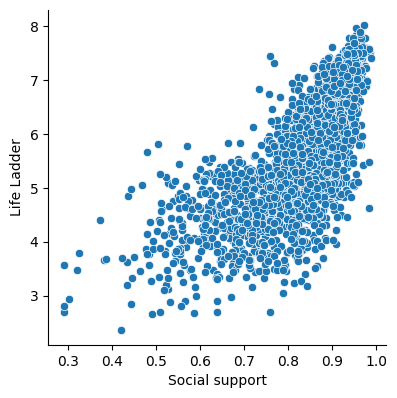

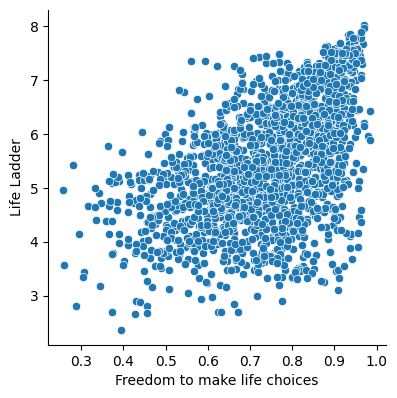

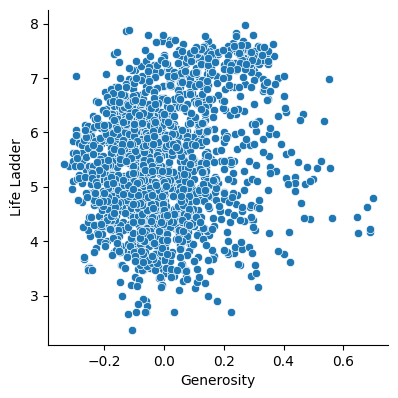

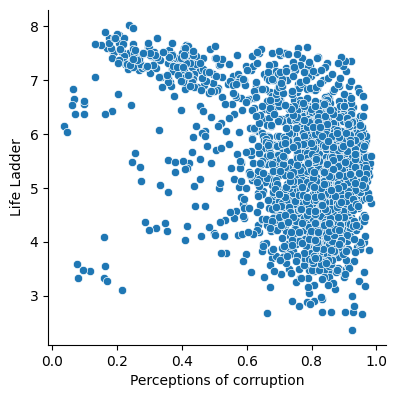

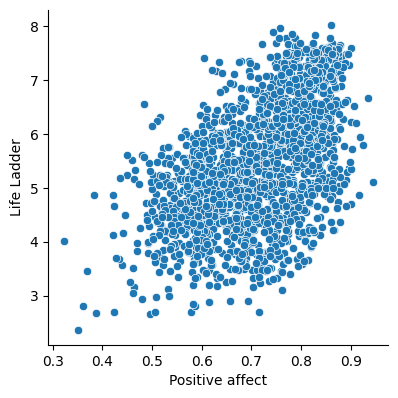

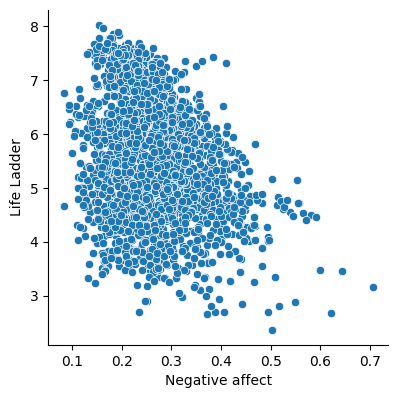

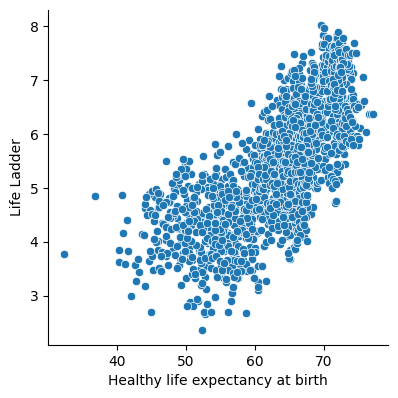

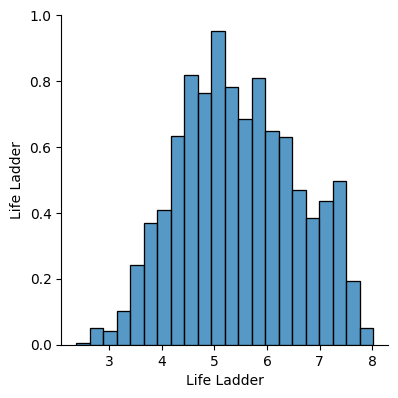

In [107]:
# between the Label and the each attribute
correlations_matrix_2 = (data).corr()
print(correlations_matrix_2["Life Ladder"].sort_values(ascending=False))


for attr in data[continuous_attributes]:
  sns.pairplot(data=data, x_vars=[attr], y_vars=["Life Ladder"], kind="scatter", height=4)
  plt.show()



*   From the correlation table between the label and the attributes , we have observed that Log GDP per capita , Social support and Health life expectancy at birth are strongly correlated with each other.
*   We can remove Generosity attribute and year attribute as the correlation coefficient is very weak with label.



In [108]:
# drop weak correlated colums and label
data_num_updated=data[continuous_attributes]
data_num_updated.drop(columns=["Life Ladder","Generosity"],axis=1, inplace =True)

In [109]:
data_num_updated.head()

,Log GDP per capita,Social support,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Healthy life expectancy at birth
0,7.370,0.451,0.718,0.882,0.518,0.258,50.80
1,7.540,0.552,0.679,0.850,0.584,0.237,51.20
2,7.647,0.539,0.600,0.707,0.618,0.275,51.60
3,7.620,0.521,0.496,0.731,0.611,0.267,51.92
4,7.705,0.521,0.531,0.776,0.710,0.268,52.24


In [110]:
#dropping rows which have null value in the label
data =data.dropna(subset=['Life Ladder'])

**Preprocessing the dataset**

In [111]:
continuous_attributes =['Log GDP per capita', 'Social support', 'Freedom to make life choices',
                         'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Healthy life expectancy at birth']
num_con_pipeline= make_pipeline(StandardScaler(),SimpleImputer(strategy='median'))

In [112]:
categorical_attributes = ['Country name']
cate_pipeline= make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown="ignore",sparse_output=False))

In [113]:
prep= ColumnTransformer([("cont",num_con_pipeline,continuous_attributes),("cate",cate_pipeline,categorical_attributes)])

In [114]:
attri_prep= prep.fit_transform(data)

In [115]:
attributes= pd.DataFrame(attri_prep,columns=prep.get_feature_names_out(),index=data.index)

In [116]:
y= pd.DataFrame(data['Life Ladder'])

In [117]:
attributes.describe()#y.describe()

,cont__Log GDP per capita,cont__Social support,cont__Freedom to make life choices,cont__Perceptions of corruption,cont__Positive affect,cont__Negative affect,cont__Healthy life expectancy at birth,cate__Country name_Afghanistan,cate__Country name_Albania,cate__Country name_Algeria,...,cate__Country name_United Arab Emirates,cate__Country name_United Kingdom,cate__Country name_United States,cate__Country name_Uruguay,cate__Country name_Uzbekistan,cate__Country name_Venezuela,cate__Country name_Vietnam,cate__Country name_Yemen,cate__Country name_Zambia,cate__Country name_Zimbabwe
count,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,...,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000
mean,0.001466,0.001292,0.002363,0.016585,0.001265,-0.001017,0.006918,0.006157,0.006670,0.004105,...,0.006670,0.007696,0.007696,0.007696,0.006670,0.007696,0.007183,0.006157,0.007183,0.007696
std,0.991033,0.997040,0.992180,0.973985,0.994666,0.996205,0.986878,0.078245,0.081419,0.063952,...,0.081419,0.087412,0.087412,0.087412,0.081419,0.087412,0.084470,0.078245,0.084470,0.087412
min,-2.369123,-4.411546,-3.411037,-3.813498,-3.623754,-2.179129,-4.136693,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.771768,-0.519642,-0.658598,-0.257714,-0.775207,-0.722808,-0.593929,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.079345,0.193733,0.143904,0.293861,0.112045,-0.123837,0.245147,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.837721,0.780473,0.784497,0.647297,0.821847,0.592579,0.671344,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.975717,1.472742,1.706670,1.263133,2.185413,5.125967,1.830068,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**D.Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.**

In [118]:
# 4. Data Splitting
# Split data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(attributes, y, test_size=0.2, random_state=42,shuffle=True)

#imputer = SimpleImputer(strategy='median')
#X_train = imputer.fit_transform(X_train_before_impute)
#X_test = imputer.transform(X_test_before_impute)



In [119]:
# verification of  that our test portion of the data is representative of the entire dataset.

attributes.describe()
#for attr in continuous_attributes:
#    print("For attribute in dataset {}: Mean: {}, Median: {}, Standard Deviation: {}".format(attr, X[attr].mean(), X[attr].median(), X[attr].std()))
#    print("For attribute in test data {}: Mean: {}, Median: {}, Standard Deviation: {}".format(attr, X_test[attr].mean(), X_test[attr].median(), X_test[attr].std()))
# Assuming you've already split the dataset and imputed missing values as you mentioned

# for attr in continuous_attributes:
#     attr_index = continuous_attributes.index(attr)  # Get the index of the attribute
#     print("For attribute in dataset {}: Mean: {:.2f}, Median: {:.2f}, Standard Deviation: {:.2f}".format(attr, X[:, attr_index].mean(), np.median(X[:, attr_index], axis=0), X[:, attr_index].std()))
#     print("For attribute in test data {}: Mean: {:.2f}, Median: {:.2f}, Standard Deviation: {:.2f}".format(attr, X_test[:, attr_index].mean(), np.median(X_test[:, attr_index], axis=0), X_test[:, attr_index].std()))


,cont__Log GDP per capita,cont__Social support,cont__Freedom to make life choices,cont__Perceptions of corruption,cont__Positive affect,cont__Negative affect,cont__Healthy life expectancy at birth,cate__Country name_Afghanistan,cate__Country name_Albania,cate__Country name_Algeria,...,cate__Country name_United Arab Emirates,cate__Country name_United Kingdom,cate__Country name_United States,cate__Country name_Uruguay,cate__Country name_Uzbekistan,cate__Country name_Venezuela,cate__Country name_Vietnam,cate__Country name_Yemen,cate__Country name_Zambia,cate__Country name_Zimbabwe
count,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,...,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000
mean,0.001466,0.001292,0.002363,0.016585,0.001265,-0.001017,0.006918,0.006157,0.006670,0.004105,...,0.006670,0.007696,0.007696,0.007696,0.006670,0.007696,0.007183,0.006157,0.007183,0.007696
std,0.991033,0.997040,0.992180,0.973985,0.994666,0.996205,0.986878,0.078245,0.081419,0.063952,...,0.081419,0.087412,0.087412,0.087412,0.081419,0.087412,0.084470,0.078245,0.084470,0.087412
min,-2.369123,-4.411546,-3.411037,-3.813498,-3.623754,-2.179129,-4.136693,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.771768,-0.519642,-0.658598,-0.257714,-0.775207,-0.722808,-0.593929,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.079345,0.193733,0.143904,0.293861,0.112045,-0.123837,0.245147,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.837721,0.780473,0.784497,0.647297,0.821847,0.592579,0.671344,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.975717,1.472742,1.706670,1.263133,2.185413,5.125967,1.830068,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
X_test.describe()

,cont__Log GDP per capita,cont__Social support,cont__Freedom to make life choices,cont__Perceptions of corruption,cont__Positive affect,cont__Negative affect,cont__Healthy life expectancy at birth,cate__Country name_Afghanistan,cate__Country name_Albania,cate__Country name_Algeria,...,cate__Country name_United Arab Emirates,cate__Country name_United Kingdom,cate__Country name_United States,cate__Country name_Uruguay,cate__Country name_Uzbekistan,cate__Country name_Venezuela,cate__Country name_Vietnam,cate__Country name_Yemen,cate__Country name_Zambia,cate__Country name_Zimbabwe
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.0,390.000000,390.000000,...,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.0,390.000000,390.000000,390.000000
mean,0.020627,-0.003114,0.022427,-0.004638,0.055050,0.041249,0.025709,0.0,0.002564,0.007692,...,0.005128,0.005128,0.002564,0.007692,0.010256,0.015385,0.0,0.005128,0.007692,0.012821
std,0.966890,0.988339,0.982008,0.974591,0.957890,1.031655,0.996027,0.0,0.050637,0.087480,...,0.071519,0.071519,0.050637,0.087480,0.100883,0.123235,0.0,0.071519,0.087480,0.112644
min,-2.292852,-4.107623,-3.411037,-3.583229,-3.184798,-1.944239,-3.003541,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,-0.745117,-0.591402,-0.574124,-0.272441,-0.688817,-0.731616,-0.490043,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.080645,0.193733,0.143904,0.293861,0.112045,-0.123837,0.245147,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.887123,0.793136,0.788017,0.635248,0.875549,0.624877,0.681333,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.864777,1.371435,1.671472,1.263133,1.783815,4.397806,1.550376,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [121]:
#y_train=pd.DataFrame(y_train)
y_train.describe()

,Life Ladder
count,1559.000000
mean,5.469321
std,1.113280
min,2.375000
25%,4.649500
50%,5.374000
75%,6.272500
max,8.019000


If we look at the data given by test describe , the mean , median and standard deviation and the quartile range looks similiar. This means test portion of thee data is the representative of the entire dataset.

**E.Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.**

 **Linear Regression**

In [122]:
linear=LinearRegression().fit(X_train,y_train)
linear_cv=cross_validate(linear,X_train,y_train,scoring=['neg_root_mean_squared_error'],cv=4,return_train_score=True)

In [123]:
print("training loss : {:,.3f}".format(-np.mean(linear_cv['train_neg_root_mean_squared_error'])))
print("validation loss : {:,.3f}".format(-np.mean(linear_cv['test_neg_root_mean_squared_error'])))

training loss : 0.328
validation loss : 94,289,888,075.400


**SGD**

In [124]:
sgd=SGDRegressor(max_iter=1000, tol=1e-5,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd.fit(X_train,y_train)
sgd_cv=cross_validate(sgd,X_train,y_train,scoring=['neg_root_mean_squared_error'],cv=4,return_train_score=True)

In [125]:
print("training loss : {:,.3f}".format(-np.mean(sgd_cv['train_neg_root_mean_squared_error'])))
print("Validation loss : {:,.3f}".format(-np.mean(sgd_cv['test_neg_root_mean_squared_error'])))


training loss : 0.338
Validation loss : 0.394


**SGD, display the training and validation loss as a function of training iteration.**

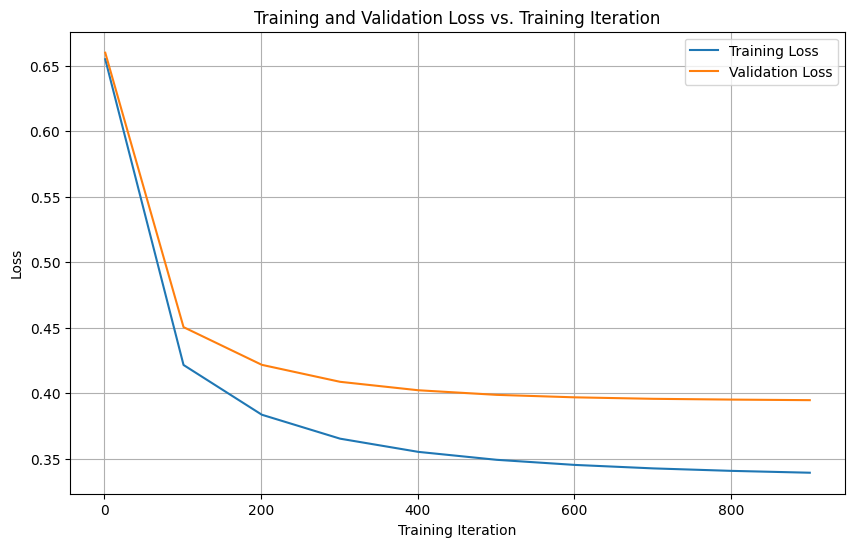

In [126]:
t_loss=[]
v_loss=[]
for i in range(1,1001,100):
  sgd1=SGDRegressor(max_iter=i, tol=1e-5,eta0=0.01,n_iter_no_change=100,random_state=42)
  sgd1.fit(X_train,y_train)
  sgd1_cv=cross_validate(sgd1,X_train,y_train,scoring=['neg_root_mean_squared_error'],cv=4,return_train_score=True)
  t_loss.append(-np.mean(sgd1_cv['train_neg_root_mean_squared_error']))
  v_loss.append(-np.mean(sgd1_cv['test_neg_root_mean_squared_error']))
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1000 + 1,100), t_loss, label='Training Loss')
plt.plot(range(1, 1000 + 1,100), v_loss, label='Validation Loss')
plt.xlabel('Training Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss vs. Training Iteration')
plt.grid(True)
plt.show()




**Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact.**

In [127]:


# Define a range of alpha (penalty term) values to explore
alphas = [0.01, 0.1, 1.0, 10.0]

# Initialize lists to store results
ridge_results = []
lasso_results = []
elastic_net_results = []

# Ridge Regression
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    rmse_mean = rmse_scores.mean()
    ridge_results.append({'Alpha': alpha, 'RMSE Mean': rmse_mean})

# Lasso Regression
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    rmse_mean = rmse_scores.mean()
    lasso_results.append({'Alpha': alpha, 'RMSE Mean': rmse_mean})

# Elastic Net
for alpha in alphas:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
    scores = cross_val_score(elastic_net, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    rmse_mean = rmse_scores.mean()
    elastic_net_results.append({'Alpha': alpha, 'RMSE Mean': rmse_mean})

# Print the results for Ridge, Lasso, and Elastic Net
print("Ridge Regression Results:")
print(ridge_results)
print("Lasso Regression Results:")
print(lasso_results)
print("Elastic Net Results:")
print(elastic_net_results)


Ridge Regression Results:
[{'Alpha': 0.01, 'RMSE Mean': 0.39404487634287616}, {'Alpha': 0.1, 'RMSE Mean': 0.3925277989034713}, {'Alpha': 1.0, 'RMSE Mean': 0.39216835148749724}, {'Alpha': 10.0, 'RMSE Mean': 0.44746209830576567}]
Lasso Regression Results:
[{'Alpha': 0.01, 'RMSE Mean': 0.5505092674811123}, {'Alpha': 0.1, 'RMSE Mean': 0.5689471675973854}, {'Alpha': 1.0, 'RMSE Mean': 1.1135368907767966}, {'Alpha': 10.0, 'RMSE Mean': 1.1135368907767966}]
Elastic Net Results:
[{'Alpha': 0.01, 'RMSE Mean': 0.5335134569761519}, {'Alpha': 0.1, 'RMSE Mean': 0.5569713224848896}, {'Alpha': 1.0, 'RMSE Mean': 0.8842117445112189}, {'Alpha': 10.0, 'RMSE Mean': 1.1135368907767966}]


**Ridge Regression:**

The RMSE mean values for Ridge regression remain fairly consistent across different alpha values, with only a slight variation.
This suggests that the choice of alpha in Ridge regression doesn't have a significant impact on the model's performance in this particular dataset.
Ridge regression provides stable and consistent results with minimal sensitivity to the regularization strength.

**Lasso Regression:**

Lasso regression shows a distinct behavior compared to Ridge and Elastic Net.
As alpha increases, the RMSE mean increases significantly, indicating that stronger regularization leads to poorer model performance.
The model appears to perform poorly with higher alpha values, suggesting that Lasso might not be suitable for this dataset without careful alpha tuning.

**Elastic Net:**

Elastic Net combines Ridge and Lasso regularization, and its behavior is intermediate between the two.
The RMSE mean values increase gradually as alpha increases.
Elastic Net offers a compromise between Ridge and Lasso, providing a stable performance with moderate sensitivity to alpha.

**Hypertunning with learning rate**

In [128]:
learning_rates = [0.01, 0.1, 0.5]
#batch_sizes = [32, 64, 128]

# Initialize lists to store results
sgd_results = []

for lr_rate in learning_rates:
    #for batch_size_choosen in batch_sizes:
        sgd = SGDRegressor(learning_rate='constant', eta0=lr_rate, max_iter=100, tol=1e-3, random_state=42)
        scores = cross_val_score(sgd, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)
        rmse_mean = rmse_scores.mean()
        sgd_results.append({'Learning Rate': lr_rate,'RMSE Mean': rmse_mean})

# Print the results for SGDRegressor
print("SGDRegressor Results:")
print(sgd_results)

SGDRegressor Results:
[{'Learning Rate': 0.01, 'RMSE Mean': 0.4037055306456647}, {'Learning Rate': 0.1, 'RMSE Mean': 0.457765208586725}, {'Learning Rate': 0.5, 'RMSE Mean': 2485019152161.948}]


**Hypertuning with batch size and learning rate simultaneously**

In [129]:
import warnings
warnings.filterwarnings("ignore")



from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Define hyperparameters
learning_rate = [0.01,0.1,1]
max_epochs = 15
batch_sizes = [32, 64, 100]  # Explore different batch sizes
for j in learning_rate:
  # Initialize the SGDRegressor
  regressor = SGDRegressor(learning_rate='constant', eta0=j, random_state=42)

  # Training loop
  for batch_size in batch_sizes:
      for epoch in range(max_epochs):
          for i in range(0, len(X_train), batch_size):
              # Get the current mini-batch
              X_batch = X_train[i:i + batch_size]
              y_batch = y_train[i:i + batch_size]

              # Update the model parameters using the mini-batch
              regressor.partial_fit(X_batch, y_batch)

          # Make predictions on the test set
          y_pred = regressor.predict(X_test)

          # Calculate Mean Squared Error on the test set
          mse = mean_squared_error(y_test, y_pred)

          # Print the batch size and test MSE for this epoch
          print(f'Learning_rate:{j},Batch Size: {batch_size}, Epoch: {epoch + 1}, Test MSE: {mse}')


Learning_rate:0.01,Batch Size: 32, Epoch: 1, Test MSE: 0.2735792182361322
Learning_rate:0.01,Batch Size: 32, Epoch: 2, Test MSE: 0.24990340204102734
Learning_rate:0.01,Batch Size: 32, Epoch: 3, Test MSE: 0.2310846752839414
Learning_rate:0.01,Batch Size: 32, Epoch: 4, Test MSE: 0.21589834440951236
Learning_rate:0.01,Batch Size: 32, Epoch: 5, Test MSE: 0.20362147309576192
Learning_rate:0.01,Batch Size: 32, Epoch: 6, Test MSE: 0.19368794086493346
Learning_rate:0.01,Batch Size: 32, Epoch: 7, Test MSE: 0.1856443767754954
Learning_rate:0.01,Batch Size: 32, Epoch: 8, Test MSE: 0.17912655849907166
Learning_rate:0.01,Batch Size: 32, Epoch: 9, Test MSE: 0.1738415490458002
Learning_rate:0.01,Batch Size: 32, Epoch: 10, Test MSE: 0.1695535307436082
Learning_rate:0.01,Batch Size: 32, Epoch: 11, Test MSE: 0.16607250161391257
Learning_rate:0.01,Batch Size: 32, Epoch: 12, Test MSE: 0.1632452421354822
Learning_rate:0.01,Batch Size: 32, Epoch: 13, Test MSE: 0.16094808929711488
Learning_rate:0.01,Batch Si

From the above results, it appears that the choice of batch size and learning rate significantly impacts the performance of the SGDRegressor model.

1. **Batch Size Impact:**
   - Smaller batch sizes (e.g., 32) generally result in lower Mean Squared Error (MSE) on the test set compared to larger batch sizes (e.g., 64, 100).
   - Extremely large batch sizes (e.g., 100) can lead to numerical instability and produce very high MSE values (e.g., inf).

2. **Learning Rate Impact:**
   - Lower learning rates (e.g., 0.01) tend to perform well, achieving lower MSE values.
   - Very high learning rates (e.g., 1) can lead to divergence and result in extremely high MSE values (e.g., inf).

3. **Overall Summary:**
   - A batch size of 32 with a learning rate of 0.01 appears to be a good combination for this task, resulting in the lowest MSE on the test set.
   - It's important to choose an appropriate learning rate, as values that are too high can cause divergence, while values that are too low may result in slow convergence.
   - Batch size impacts the convergence speed, with smaller batches converging faster but potentially requiring more iterations.

**F.Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data**

**Polynomial Regression with Normal form**

In [130]:
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)


In [131]:
poly=LinearRegression().fit(X_train_poly,y_train)
poly_cv=cross_validate(poly,X_train_poly,y_train,scoring=['neg_root_mean_squared_error'], cv=4 ,return_train_score=True)

In [175]:
print("training loss : {:,.3f}".format(-np.mean(poly_cv['train_neg_root_mean_squared_error'])))
print("validation loss : {:,.3f}".format(-np.mean(poly_cv['test_neg_root_mean_squared_error'])))

training loss : 0.061
validation loss : 76,405,973.473


In [133]:
for fold, val_loss in enumerate(poly_cv['test_neg_root_mean_squared_error']):
    print(f"Validation loss for Fold {fold + 1}: {-val_loss:.3f}")


Validation loss for Fold 1: 305623866.200
Validation loss for Fold 2: 8.445
Validation loss for Fold 3: 4.627
Validation loss for Fold 4: 14.619


model seems to perform well on some validation folds (Folds 2 and 3) with low validation losses, indicating good generalization. However, there is a significant issue with underfitting on Fold 1, where the validation loss is extremely high. Fold 4 shows moderate performance. This suggests that the model may need further tuning or regularization to prevent underfitting and improve its overall generalization across different validation sets

**Polynomial Regression with SGD**

In [134]:
sgd_poly=SGDRegressor(max_iter=1000, tol=1e-5,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_poly.fit(X_train_poly,y_train)
sgd_cv_poly=cross_validate(sgd_poly,X_train_poly,y_train,scoring=['neg_root_mean_squared_error'],cv=4,return_train_score=True)

In [135]:
print("training loss : {:,.3f}".format(-np.mean(sgd_cv_poly['train_neg_root_mean_squared_error'])))
print("Validation loss : {:,.3f}".format(-np.mean(sgd_cv_poly['test_neg_root_mean_squared_error'])))


training loss : 0.223
Validation loss : 0.379


In [136]:
for fold, val_loss in enumerate(sgd_cv_poly['test_neg_root_mean_squared_error']):
    print(f"Validation loss for Fold {fold + 1}: {-val_loss:.3f}")


Validation loss for Fold 1: 0.376
Validation loss for Fold 2: 0.369
Validation loss for Fold 3: 0.405
Validation loss for Fold 4: 0.364


The model appears to perform well across all four validation folds, with validation losses that are close to the training loss. There is no strong evidence of overfitting (high validation loss compared to training loss) or underfitting (high validation loss in general).

**SGD, display the training and validation loss as a function of training iteration.**

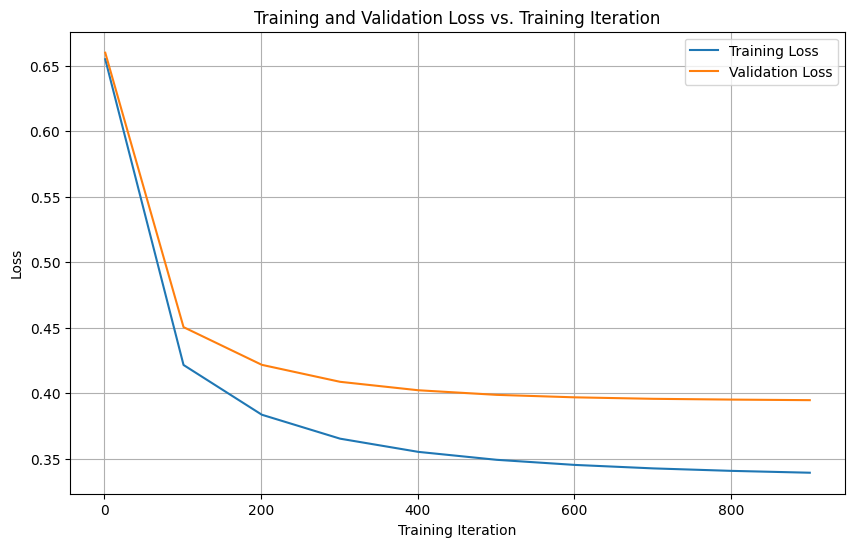

In [137]:
t_loss_poly=[]
v_loss_poly=[]
for i in range(1,1001,100):
  sgd_poly_1=SGDRegressor(max_iter=i, tol=1e-5,eta0=0.01,n_iter_no_change=100,random_state=42)
  sgd_poly_1.fit(X_train,y_train)
  sgd1_cv_poly=cross_validate(sgd_poly_1,X_train,y_train,scoring=['neg_root_mean_squared_error'],cv=4,return_train_score=True)
  t_loss_poly.append(-np.mean(sgd1_cv_poly['train_neg_root_mean_squared_error']))
  v_loss_poly.append(-np.mean(sgd1_cv_poly['test_neg_root_mean_squared_error']))
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1000 + 1,100), t_loss_poly, label='Training Loss')
plt.plot(range(1, 1000 + 1,100), v_loss_poly, label='Validation Loss')
plt.xlabel('Training Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss vs. Training Iteration')
plt.grid(True)
plt.show()

**Polynomial Regression with Ridge, Lasso, ElasticNet**

**Polynomial Regression with Ridge, Lasso, ElasticNet**

In [138]:


# Define a range of alpha (penalty term) values to explore
alphas = [0.01, 0.1, 1.0, 10.0]

# Initialize lists to store results
ridge_results_poly = []
lasso_results_poly = []
elastic_net_results_poly = []
# Ridge Regression
for alpha in alphas:
    ridge_poly = Ridge(alpha=alpha)
    ridge_poly.fit(X_train_poly,y_train)
    scores = cross_val_score(ridge_poly, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores_poly = np.sqrt(-scores)
    rmse_mean_poly = rmse_scores_poly.mean()
    ridge_results_poly.append({'Alpha': alpha, 'RMSE Mean': rmse_mean_poly})

# Lasso Regression
for alpha in alphas:
    lasso_poly = Lasso(alpha=alpha)
    lasso_poly.fit(X_train_poly,y_train)
    scores = cross_val_score(lasso_poly, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores_poly = np.sqrt(-scores)
    rmse_mean_poly = rmse_scores_poly.mean()
    lasso_results_poly.append({'Alpha': alpha, 'RMSE Mean': rmse_mean_poly})

# Elastic Net
for alpha in alphas:
    elastic_net_poly = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net_poly.fit(X_train_poly,y_train)
    scores = cross_val_score(elastic_net_poly, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores_poly = np.sqrt(-scores)
    rmse_mean_poly = rmse_scores_poly.mean()
    elastic_net_results_poly.append({'Alpha': alpha, 'RMSE Mean': rmse_mean_poly})

# Print the results for Ridge, Lasso, and Elastic Net
print("Ridge Regression Results:")
print(ridge_results_poly)
print("Lasso Regression Results:")
print(lasso_results_poly)
print("Elastic Net Results:")
print(elastic_net_results_poly)


Ridge Regression Results:
[{'Alpha': 0.01, 'RMSE Mean': 0.5994648457347068}, {'Alpha': 0.1, 'RMSE Mean': 0.44942539341729376}, {'Alpha': 1.0, 'RMSE Mean': 0.3754043195901539}, {'Alpha': 10.0, 'RMSE Mean': 0.37792646431730026}]
Lasso Regression Results:
[{'Alpha': 0.01, 'RMSE Mean': 0.511425403355862}, {'Alpha': 0.1, 'RMSE Mean': 0.5598749158148203}, {'Alpha': 1.0, 'RMSE Mean': 1.1135368907767966}, {'Alpha': 10.0, 'RMSE Mean': 1.1135368907767966}]
Elastic Net Results:
[{'Alpha': 0.01, 'RMSE Mean': 0.4874351675151948}, {'Alpha': 0.1, 'RMSE Mean': 0.531852525523521}, {'Alpha': 1.0, 'RMSE Mean': 0.8836591319943383}, {'Alpha': 10.0, 'RMSE Mean': 1.1135368907767966}]


**Ridge Regression Results:**

For Ridge regression, lower alpha values (0.01 and 0.1) result in lower RMSE means, indicating better performance.
As alpha increases (1.0 and 10.0), the RMSE mean also increases, suggesting increased regularization, which can lead to less overfitting but potentially higher bias.

**Lasso Regression Results:**

Lasso regression shows similar trends, with lower alpha values (0.01 and 0.1) leading to lower RMSE means.
The RMSE means are generally higher for Lasso compared to Ridge, suggesting that Lasso might be penalizing some features more aggressively.

**Elastic Net Results:**

Elastic Net combines L1 (Lasso) and L2 (Ridge) regularization, and the results fall in between those of Ridge and Lasso.
Lower alpha values (0.01 and 0.1) still perform better in terms of lower RMSE means.

**Summary:**

Lower alpha values generally perform better in terms of RMSE mean across all three regularization techniques. This indicates that less regularization (lower alpha) is favored for this dataset and polynomial regression model.
Lasso tends to have slightly higher RMSE means compared to Ridge and Elastic Net, suggesting that it might be more aggressive in feature selection.
Elastic Net, being a combination of Ridge and Lasso, provides a middle ground in terms of RMSE means.

**Hypertuning with batch size and learning rate simultaneously**

In [140]:
warnings.filterwarnings("ignore")


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Define hyperparameters
learning_rate_poly = [0.01,0.1,1]
max_epochs_poly = 15
batch_sizes_poly = [32, 64, 100]  # Explore different batch sizes
for j in learning_rate_poly:
  # Initialize the SGDRegressor
  regressor = SGDRegressor(learning_rate='constant', eta0=j, random_state=42)

  # Training loop
  for batch_size in batch_sizes_poly:
      for epoch in range(max_epochs_poly):
          for i in range(0, len(X_train_poly), batch_size):
              # Get the current mini-batch
              X_batch_poly = X_train_poly[i:i + batch_size]
              y_batch_poly = y_train[i:i + batch_size]

              # Update the model parameters using the mini-batch
              regressor.partial_fit(X_batch_poly, y_batch_poly)

          # Make predictions on the test set
          y_pred_poly = regressor.predict(X_test_poly)

          # Calculate Mean Squared Error on the test set
          mse = mean_squared_error(y_test, y_pred_poly)

          # Print the batch size and test MSE for this epoch
          print(f'Learning_rate:{j},Batch Size: {batch_size}, Epoch: {epoch + 1}, Test MSE: {mse}')

Learning_rate:0.01,Batch Size: 32, Epoch: 1, Test MSE: 333.3243305039038
Learning_rate:0.01,Batch Size: 32, Epoch: 2, Test MSE: 13768.931912752074
Learning_rate:0.01,Batch Size: 32, Epoch: 3, Test MSE: 658984.0167638961
Learning_rate:0.01,Batch Size: 32, Epoch: 4, Test MSE: 31092059.232730985
Learning_rate:0.01,Batch Size: 32, Epoch: 5, Test MSE: 1470414849.6991699
Learning_rate:0.01,Batch Size: 32, Epoch: 6, Test MSE: 69513622930.3243
Learning_rate:0.01,Batch Size: 32, Epoch: 7, Test MSE: 3286454165197.8545
Learning_rate:0.01,Batch Size: 32, Epoch: 8, Test MSE: 155374615678988.28
Learning_rate:0.01,Batch Size: 32, Epoch: 9, Test MSE: 7345705704143837.0
Learning_rate:0.01,Batch Size: 32, Epoch: 10, Test MSE: 3.472856247273946e+17
Learning_rate:0.01,Batch Size: 32, Epoch: 11, Test MSE: 1.6418751103338121e+19
Learning_rate:0.01,Batch Size: 32, Epoch: 12, Test MSE: 8.610364026289863e+20
Learning_rate:0.01,Batch Size: 32, Epoch: 13, Test MSE: 4.22629801814668e+21
Learning_rate:0.01,Batch S

it appears that the choice of batch size and learning rate significantly impacts the performance of the stochastic gradient descent (SGD) regression model.

**Batch Size Impact:**

Smaller batch sizes (e.g., 32) generally result in lower Mean Squared Error (MSE) on the test set compared to larger batch sizes (e.g., 64, 100).
Extremely large batch sizes (e.g., 100) can lead to numerical instability and produce very high MSE values (e.g., inf).

**Learning Rate Impact:**

Lower learning rates (e.g., 0.01) tend to perform well, achieving lower MSE values.
Very high learning rates (e.g., 1) can lead to divergence and result in extremely high MSE values (e.g., inf).

**Overall Summary:**

A batch size of 32 with a learning rate of 0.01 appears to be a good combination for this task, resulting in the lowest MSE on the test set. This combination strikes a balance between convergence speed and stability.

It's important to choose an appropriate learning rate, as values that are too high can cause divergence, while values that are too low may result in slow convergence. Additionally, batch size impacts the convergence speed, with smaller batches converging faster but potentially requiring more iterations.

When fine-tuning SGDRegressor models, it's advisable to perform hyperparameter tuning to identify the best combination of batch size and learning rate for your specific dataset and problem.






**G. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.**

**Model1 : Simple Linear Regression**

In [141]:
linear = LinearRegression().fit(X_train,y_train)
y_pred=linear.predict(X_test)

**Prediction on the Test Labels**

In [143]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred': y_pred.flatten()})
print(results_df)

     y_test    y_pred
0     6.502  6.351954
1     6.201  5.881677
2     4.573  4.924075
3     5.786  5.946315
4     7.025  7.249270
..      ...       ...
385   7.118  6.817277
386   6.387  6.280749
387   5.970  5.468293
388   6.057  6.065223
389   7.153  6.726878

[390 rows x 2 columns]


**Reporting the Evaluation Metric**

In [144]:
print("Simple Linear Regression")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

Simple Linear Regression

 Root mean Squared error(RMSE):0.401


**Model2: Linear Regression ith SGD**

In [145]:
sgd=SGDRegressor(max_iter=1000, tol=1e-5,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd.fit(X_train,y_train)
y_pred0=sgd.predict(X_test)

**Prediction on the Test Labels**

In [147]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred0': y_pred0.flatten()})
print(results_df)

     y_test   y_pred0
0     6.502  6.361593
1     6.201  5.928989
2     4.573  4.912198
3     5.786  5.958480
4     7.025  7.237430
..      ...       ...
385   7.118  6.848231
386   6.387  6.259564
387   5.970  5.560900
388   6.057  6.069480
389   7.153  6.644337

[390 rows x 2 columns]


**Reporting the Evaluation Metric**

In [148]:
print("Linear Regression ith SGD")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred0))))

Linear Regression ith SGD

 Root mean Squared error(RMSE):0.390


**Model3: Linear Regression with Ridge Regularization**

In [149]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
y_pred1=ridge.predict(X_test)

**Prediction on the Test Labels**

In [150]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred1': y_pred1.flatten()})
print(results_df)

     y_test   y_pred1
0     6.502  6.359435
1     6.201  5.931266
2     4.573  4.915851
3     5.786  5.954190
4     7.025  7.218573
..      ...       ...
385   7.118  6.835068
386   6.387  6.277048
387   5.970  5.559354
388   6.057  6.098780
389   7.153  6.662048

[390 rows x 2 columns]


**Reporting the Evaluation Metric**

In [151]:
print("Linear Regression ith SGD")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred1))))

Linear Regression ith SGD

 Root mean Squared error(RMSE):0.391


**Model4: Linear Regression with Lasso Regularization**

In [152]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
y_pred2=lasso.predict(X_test)

**Prediction on the Test Labels**

In [153]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred2': y_pred2.flatten()})
print(results_df)

     y_test   y_pred2
0     6.502  6.413566
1     6.201  6.129431
2     4.573  4.926345
3     5.786  6.061819
4     7.025  6.924708
..      ...       ...
385   7.118  6.827203
386   6.387  6.300800
387   5.970  5.793880
388   6.057  6.611573
389   7.153  6.606296

[390 rows x 2 columns]


**Reporting the Evaluation Metric**

In [154]:
print("Linear Regression with Lasso Regularization")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred2))))

Linear Regression with Lasso Regularization

 Root mean Squared error(RMSE):0.554


**Model5:Linear Regression with Elastic Net Regularization**

In [155]:
elastic_net = ElasticNet(alpha=0.01)
elastic_net.fit(X_train,y_train)
y_pred3=elastic_net.predict(X_test)

**Prediction on the Test Labels**

In [156]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred3': y_pred3.flatten()})
print(results_df)

     y_test   y_pred3
0     6.502  6.407237
1     6.201  6.137458
2     4.573  4.909665
3     5.786  6.058149
4     7.025  6.931793
..      ...       ...
385   7.118  6.835617
386   6.387  6.283893
387   5.970  5.796156
388   6.057  6.601959
389   7.153  6.614478

[390 rows x 2 columns]


**Reporting the Evaluation Metric**

In [157]:
print("Linear Regression with Elastic Net Regularization")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred3))))

Linear Regression with Elastic Net Regularization

 Root mean Squared error(RMSE):0.533


**Model 6: Simple Polynomial Regression**

In [158]:
poly=LinearRegression().fit(X_train_poly,y_train)
y_pred4=poly.predict(X_test_poly)

**Prediction on the Test Labels**

In [159]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred4': y_pred4.flatten()})
print(results_df)

     y_test    y_pred4
0     6.502   8.379659
1     6.201   6.435317
2     4.573   4.572648
3     5.786  11.939000
4     7.025   7.780350
..      ...        ...
385   7.118   6.913196
386   6.387   6.630510
387   5.970   6.487857
388   6.057   5.768057
389   7.153   8.064420

[390 rows x 2 columns]


**Reporting the Evaluation Metric**

In [160]:
print("Simple Polynomial Regression")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred4))))

Simple Polynomial Regression

 Root mean Squared error(RMSE):2.306


**Model 7: Polynmial Regression ith SGD**

In [161]:
sgd_poly=SGDRegressor(max_iter=1000, tol=1e-5,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_poly.fit(X_train_poly,y_train)
y_pred5=sgd_poly.predict(X_test_poly)

**Prediction on the Test Labels**

In [162]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred5': y_pred5.flatten()})
print(results_df)

     y_test   y_pred5
0     6.502  6.447628
1     6.201  6.047468
2     4.573  4.998040
3     5.786  5.512126
4     7.025  7.340469
..      ...       ...
385   7.118  6.933515
386   6.387  6.262646
387   5.970  5.881008
388   6.057  5.977557
389   7.153  6.847693

[390 rows x 2 columns]


**Reporting the Evaluation Metric**

In [163]:
print("Polynmial Regression ith SGD")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred5))))

Polynmial Regression ith SGD

 Root mean Squared error(RMSE):0.350


**Model 8: Polynomial Regression with Ridge Regularization**

In [164]:
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly,y_train)
y_pred6=ridge_poly.predict(X_test_poly)

**Prediction on the Test Labels**

In [165]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred6': y_pred6.flatten()})
print(results_df)

     y_test   y_pred6
0     6.502  6.412097
1     6.201  6.237889
2     4.573  5.033037
3     5.786  5.480041
4     7.025  7.285308
..      ...       ...
385   7.118  6.924231
386   6.387  6.098664
387   5.970  6.338667
388   6.057  5.832474
389   7.153  7.186651

[390 rows x 2 columns]


**Reporting the Evaluation Metric**

In [166]:
print("Polynomial Regression with Ridge Regularization")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred6))))

Polynomial Regression with Ridge Regularization

 Root mean Squared error(RMSE):0.396


**Model 9: Polynomial Regression with Lasso Regularization**

In [167]:
lasso_poly = Lasso(alpha=0.1)
lasso_poly.fit(X_train_poly,y_train)
y_pred7=lasso_poly.predict(X_test_poly)

**Prediction on the Test Labels**

In [168]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred7': y_pred7.flatten()})
print(results_df)

     y_test   y_pred7
0     6.502  6.325461
1     6.201  6.033310
2     4.573  5.060913
3     5.786  6.004794
4     7.025  6.750198
..      ...       ...
385   7.118  6.666529
386   6.387  6.245475
387   5.970  5.768456
388   6.057  6.497998
389   7.153  6.493439

[390 rows x 2 columns]


**Reporting the Evaluation Metric**

In [169]:
print("Polynomial Regression with Lasso Regularization")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred7))))

Polynomial Regression with Lasso Regularization

 Root mean Squared error(RMSE):0.561


**Model 10: Polynomial Regression with Elastic Net Regularization**

In [170]:
elastic_net_poly = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_poly.fit(X_train_poly,y_train)
y_pred8=elastic_net_poly.predict(X_test_poly)

**Prediction on the Test Labels**

In [171]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred8': y_pred8.flatten()})
print(results_df)

     y_test   y_pred8
0     6.502  6.444092
1     6.201  6.059413
2     4.573  4.930303
3     5.786  5.968167
4     7.025  6.936011
..      ...       ...
385   7.118  6.805653
386   6.387  6.266328
387   5.970  5.744597
388   6.057  6.606426
389   7.153  6.653443

[390 rows x 2 columns]


**Reporting the Evaluation Metric**

In [172]:
print("Polynomial Regression with Elastic Net Regularization")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred7))))

Polynomial Regression with Elastic Net Regularization

 Root mean Squared error(RMSE):0.561


**Conclusion**

We have observed that Polynomial Regression with SGD and Ridge Regularization has least RMSE values i.e ~ 0.35(degree=2) with best obtained aplha value from hypertuning.

**Improvements**


1.   we used only degree=2 here, we can try with different degrees and find the best fitting model.
2.   we can use grid search for hypertuning learning rate and batch size for finding best fitting model
1.   we have taken only one evaluation metric (RMSE). To understand the model better,we can consider taking other evaluation metrics like R^2 and mean absolute error.





**References:**


1.   https://github.com/ageron/handson-ml2
2.   https://scikit-learn.org/stable/modules/classes.html
1.   https://pandas.pydata.org/docs/user_guide/index.html#user-guide
2.   https://numpy.org/doc/stable/user/index.html#user



